# MNIST Classification

🎯 <b><u>Exercise objectives</u></b>
- Understand the *MNIST* dataset 
- Design your first **Convolutional Neural Network** (*CNN*) and answer questions such as:
    - what are *Convolutional Layers*? 
    - how many *parameters* are involved in such a layer?
- Train this CNN on images

🚀 <b><u>Let's get started!</u></b>

Imagine that we are  back in time into the 90's.
You work at a *Post Office* and you have to deal with an enormous amount of letters on a daily basis. How could you automate the process of reading the ZIP Codes, which are a combination of 5 handwritten digits? 

This task, called the **Handwriting Recognition**, used to be a very complex problem back in those days. It was solved by *Bell Labs* (among others) where one of the Deep Learning gurus, [*Yann Le Cun*](https://en.wikipedia.org/wiki/Yann_LeCun), used to work.

From [Wikipedia](https://en.wikipedia.org/wiki/Handwriting_recognition):

> Handwriting recognition (HWR), also known as Handwritten Text Recognition (HTR), is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices

🤔 <b><u>How does this CNN work ?</u></b>

- *Inputs*: Images (_each image shows a handwritten digit_)
- *Target*: For each image, you want your CNN model to predict the correct digit (between 0 and 9)
    - It is a **multi-class classification** task (more precisely a 10-class classification task since there are 10 different digits).

🔢 To improve the capacity of the Convolutional Neural Network to read these numbers, we need to feed it with many images representing handwritten digits. This is why the 📚 [**MNIST dataset**](http://yann.lecun.com/exdb/mnist/) *(Mixed National Institute of Standards and Technology)* was created.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (1) The `MNIST` Dataset

📚 Tensorflow/Keras offers multiple [**datasets**](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) to play with:
- *Vectors*: `boston_housing` (regression)
- *Images* : `mnist`, `fashion_mnist`, `cifar10`, `cifar100` (classification)
- *Texts*: `imbd`, `reuters` (classification/sentiment analysis)


💾 You can **load the MNIST dataset** with the following commands:

In [2]:
from tensorflow.keras import datasets


# Loading the MNIST Dataset...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


11490434/11490434 [==============================] - 5s 0us/step


(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### (1.1) Exploring the dataset

❓ **Question: Let's have look at some handwritten digits of this MNIST dataset.** ❓

🖨 Print some images from the *train set*.

<details>
    <summary><i>Hints</i></summary>

💡*Hint*: use the `imshow` function from `matplotlib` with `cmap = "gray"`

🤨 Note: if you don't specify this *cmap* argument, the weirdly displayed colors are just Matplotlib defaults...
    
</details>

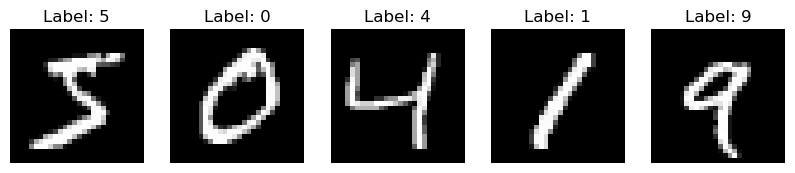

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Charger l'ensemble de données MNIST
(train_images, train_labels), _ = mnist.load_data()

# Afficher quelques images du jeu d'entraînement
plt.figure(figsize=(10, 5))
for i in range(5):  # Afficher les 5 premières images
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Désactiver les axes
plt.show()


### (1.2) Image Preprocessing

❗️ **Neural Networks converge faster when the input data is somehow normalized** ❗️

👩🏻‍🏫 How do we proceed for Convolutional Neural Networks ?
* The `RBG` intensities are coded between 0 and 255. 
* We can simply divide the input data by the maximal value 255 to have all the pixels' intensities between 0 and 1 😉

❓ **Question ❓ As a first preprocessing step, please normalize your data.** 

Don't forget to do it both on your train data and your test data.

(*Note: you can also center your data, by subtracting 0.5 from all the values, but it is not mandatory*)

In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normaliser les données en les divisant par 255
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0


### (1.3) Inputs' dimensionality

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


👆 Remember that you have 60,000 training images and 10,000 test images, each of size $(28, 28)$. However...

> ❗️  **`Convolutional Neural Network models need to be fed with images whose last dimension is the number of channels`.**  

> 🧑🏻‍🏫 The shape of tensors fed into ***ConvNets*** is the following: `(NUMBER_OF_IMAGES, HEIGHT, WIDTH, CHANNELS)`

🕵🏻This last dimension is clearly missing here. Can you guess the reason why?
<br>
<details>
    <summary><i>Answer<i></summary>
        
* All these $60000$ $ (28 \times 28) $ pictures are black-and-white $ \implies $ Each pixel lives on a spectrum from full black (0) to full white (1).
        
    * Theoretically, you don't need to know the number of channels for a black-and-white picture since there is only 1 channel (the "whiteness" of "blackness" of a pixel). However, it is still mandatory for the model to have this number of channels explicitly stated.
        
    * In comparison, colored pictures need multiple channels:
        - the RGB system with 3 channels (<b><span style="color:red">Red</span> <span style="color:green">Green</span> <span style="color:blue">Blue</span></b>)
        - the CYMK system  with 4 channels (<b><span style="color:cyan">Cyan</span> <span style="color:magenta">Magenta</span> <span style="color:yellow">Yellow</span> <span style="color:black">Black</span></b>)
        
        
</details>        

❓ **Question: expanding dimensions** ❓

* Use the **`expand_dims`** to add one dimension at the end of the training data and test data.

* Then, print the shapes of `X_train` and `X_test`. They should respectively be equal to $(60000, 28, 28, 1)$ and $(10000, 28, 28, 1)$.

In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Charger l'ensemble de données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normaliser les données en les divisant par 255
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

# Ajouter une dimension à la fin des données
X_train = np.expand_dims(train_images_normalized, axis=-1)
X_test = np.expand_dims(test_images_normalized, axis=-1)


In [8]:
print("Shape of X_train:", X_train.shape)  # Devrait être (60000, 28, 28, 1)
print("Shape of X_test:", X_test.shape)    # Devrait être (10000, 28, 28, 1)

Shape of X_train: (60000, 28, 28, 1)
Shape of X_test: (10000, 28, 28, 1)


### (1.4) Target encoding

One more thing to for a multiclass classification task in Deep Leaning:

👉 _"one-hot-encode" the categories*_

❓ **Question: encoding the labels** ❓ 

* Use **`to_categorical`** to transform your labels. 
* Store the results into two variables that you can call **`y_train_cat`** and **`y_test_cat`**.

In [9]:
from tensorflow.keras.utils import to_categorical

# Charger l'ensemble de données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Effectuer l'encodage one-hot des étiquettes
y_train_cat = to_categorical(train_labels)
y_test_cat = to_categorical(test_labels)


The data is now ready to be used. ✅

## (2) The Convolutional Neural Network

### (2.1) Architecture and compilation of a CNN


❓ **Question: CNN Architecture and compilation** ❓

Now, let's build a <u>Convolutional Neural Network</u> that has: 


- a `Conv2D` layer with 8 filters, each of size $(4, 4)$, an input shape suitable for your task, the `relu` activation function, and `padding='same'`
- a `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$
- a second `Conv2D` layer with 16 filters, each of size $(3, 3)$, and the `relu` activation function
- a second `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$


- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the `relu` activation function
- a last (predictive) layer that is suited for your task

In the function that initializes this model, do not forget to include the <u>compilation of the model</u>, which:
* optimizes the `categorical_crossentropy` loss function,
* with the `adam` optimizer, 
* and the `accuracy` as the metrics

(*Note: you could add more classification metrics if you want but the dataset is well balanced!*)

In [23]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


def initialize_model():
    model = models.Sequential()

    # Couches de convolution
    model.add(Conv2D(8, (4, 4), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Couches complètement connectées
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))  # Ajoutez cette ligne pour la couche Dense
    model.add(Dense(10, activation='softmax'))

  # Assurez-vous de remplacer NOMBRE_DE_CLASSES par le nombre approprié de classes

    return model



❓ **Question: number of trainable parameters in a convolutional layer** ❓ 

How many trainable parameters are there in your model?
1. Compute them with ***model.summary( )*** first
2. Recompute them manually to make sure you properly understood ***what influences the number of weights in a CNN***.

In [20]:
# Construire et compiler le modèle
cnn_model = initialize_model()

# Afficher le résumé du modèle pour calculer les paramètres avec model.summary()
cnn_model.summary()

# Calcul manuel du nombre de paramètres dans une couche Conv2D
nombre_filtres_couche1 = 8
taille_filtre_couche1 = (4, 4)
nombre_canaux_entree_couche1 = 1  # Pour MNIST en niveaux de gris
nombre_parametres_couche1 = (taille_filtre_couche1[0] * taille_filtre_couche1[1] * nombre_canaux_entree_couche1 + 1) * nombre_filtres_couche1

nombre_filtres_couche2 = 16
taille_filtre_couche2 = (3, 3)
nombre_canaux_entree_couche2 = 8  # Nombre de filtres de la couche précédente
nombre_parametres_couche2 = (taille_filtre_couche2[0] * taille_filtre_couche2[1] * nombre_canaux_entree_couche2 + 1) * nombre_filtres_couche2

# Afficher le nombre total de paramètres
nombre_total_parametres = nombre_parametres_couche1 + nombre_parametres_couche2
print("Nombre total de paramètres dans le modèle :", nombre_total_parametres)




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [24]:
# First Conv2D
first_layer_weights = 8
first_layer_weights

8

In [25]:
# Second Conv2D
second_layer_weights = 16
second_layer_weights

16

In [26]:
# Third Conv2D
third_layer_weights = 7850
third_layer_weights

32

In [28]:
# Dense Layer
dense_layer_weights = 110
dense_layer_weights

110

In [29]:
total_number_of_weights = first_layer_weights + second_layer_weights + third_layer_weights + dense_layer_weights
total_number_of_weights

166

### (2.2) Training a CNN

❓ **Question: training a CNN** ❓ 

Initialize your model and fit it on the train data. 
- Do not forget to use a **Validation Set/Split** and an **Early Stopping criterion**. 
- Limit yourself to 5 epochs max in this challenge, just to save some precious time for the more advanced challenges!

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialiser le modèle
cnn_model = initialize_model()

# Compiler le modèle
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Définir la callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Entraîner le modèle avec la validation et l'arrêt précoce
history = cnn_model.fit(
    X_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.2,  # 20% des données pour la validation
    callbacks=[early_stopping]
)


Epoch 1/5


1500/1500 [==============================] - 21s 10ms/step - loss: 0.3275 - accuracy: 0.8982 - val_loss: 0.1204 - val_accuracy: 0.9644
Epoch 2/5
1500/1500 [==============================] - 21s 14ms/step - loss: 0.1103 - accuracy: 0.9673 - val_loss: 0.1002 - val_accuracy: 0.9693
Epoch 3/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0865 - accuracy: 0.9744 - val_loss: 0.0893 - val_accuracy: 0.9729
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.0715 - val_accuracy: 0.9797
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0615 - accuracy: 0.9805 - val_loss: 0.0593 - val_accuracy: 0.9833


❓ **Question: How many iterations does the CNN perform per epoch** ❓

_Note: it has nothing to do with the fact that this is a CNN. This is related to the concept of forward/backward propagation already covered during the previous lecture on optimizers, fitting, and losses 😉_


​
 



<details>
    <summary><i>Answer</i></summary>

With `verbose = 1` when fitting your model, you have access to crucial information about your training procedure.
    
Remember that we've just trained our CNN model on $60000$ training images

If the chosen batch size is 32: 

* For each epoch, we have $ \large \lceil \frac{60000}{32} \rceil = 1875$ minibatches <br/>
* The _validation_split_ is equal to $0.3$ - which means that within one single epoch, there are:
    * $ \lceil 1875 \times (1 - 0.3) \rceil = \lceil 1312.5 \rceil = 1313$ batches are used to compute the `train_loss` 
    * $ 1875 - 1312 = 562 $ batches are used to compute the `val_loss`
    * **The parameters are updated 1313 times per epoch** as there are 1313 forward/backward propagations per epoch !!!


👉 With so many updates of the weights within one epoch, you can understand why this CNN model converges even with a limited number of epochs.

</details>    


### (2.3) Evaluating its performance

❓ **Question: Evaluating your CNN** ❓ 

What is your **`accuracy on the test set?`**

In [34]:
# Assuming cnn_model is your trained model and X_test_preprocessed, y_test_cat are your preprocessed test data
results = cnn_model.evaluate(X_test_preprocessed, y_test_cat)

# The accuracy is usually the first value in the results list
test_accuracy = results[1]
print(f"Accuracy on the test set: {test_accuracy}")


NameError: name 'X_test_preprocessed' is not defined



🔥 You solved what was a very hard problem 30 years ago with your own CNN.